# 6章

In [145]:
options(repr.plot.width=5, repr.plot.height=5) # default=>7

- Jupyter R Kernel install
 - https://irkernel.github.io/installation/
```R
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
devtools::install_github('IRkernel/IRkernel')
IRkernel::installspec()
```

- R標準
 - ベータ分布 => $dbeta(\theta, a, b)$
- ダウンロードしたライブラリのベータ分布表示関数
 - BernBeta => 普通のもの
 - BernGrid => グリットベースのもの


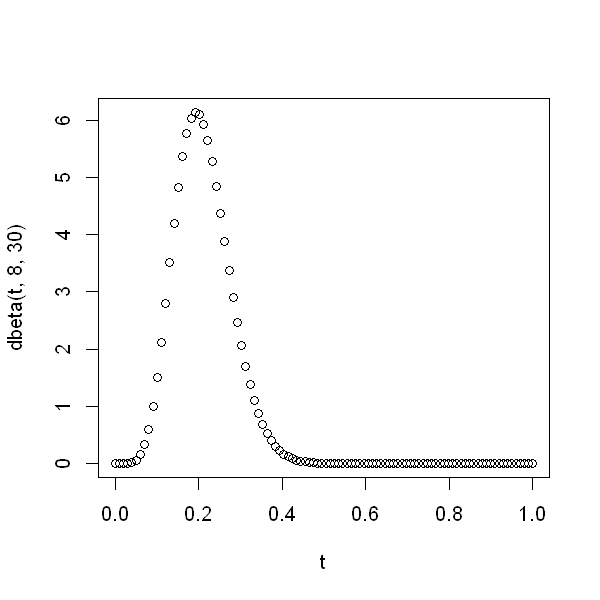

In [195]:
t = seq(0,1,length=100)
plot(t, dbeta(t, 8, 30) )

In [189]:
help( dbeta )

## 6.4 具体例

### 6.4.1 ベータ分布として表される事前知識

- 例1 コインの話


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



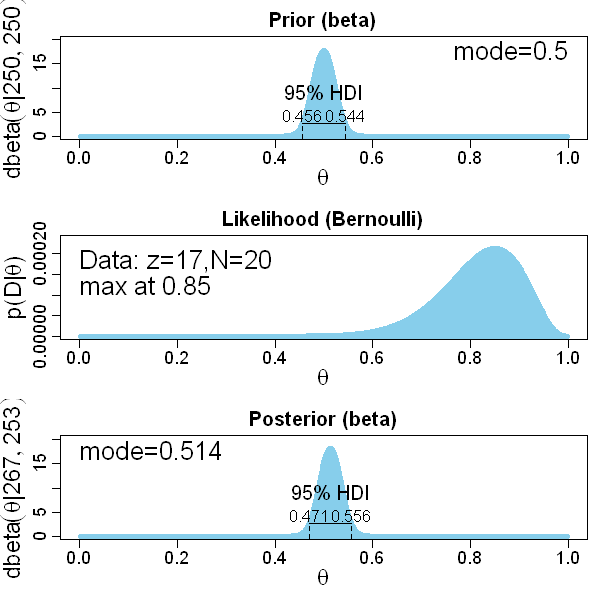

In [196]:
# Ex.1
# BernBetaExample.R
source("DBDA2E-utilities.R")  # Load definitions of graphics functions etc.
source("BernBeta.R")          # Load the definition of the BernBeta function

# Specify the prior:
#t = 0.75             # Specify the prior MODE.事前分布の最頻値
#n = 25               # Specify the effective prior sample size 事前分布のサンプル数.
a = 250 #t*(n-2) + 1      # Convert to beta shape parameter a. ベータ分布の a に変換
b = 250 #(1-t)*(n-2) + 1  # Convert to beta shape parameter b. ベータ分布の b に変換

Prior = c(a,b)       # Specify Prior as vector with the two shape parameters.

# Specify the data:
N = 20                         # The total number of flips. 尤度の N
z = 17                         # The number of heads. 尤度の z
Data = c(rep(0,N-z),rep(1,z))  # Convert N and z into vector of 0's and 1's.

#openGraph(width=5,height=7)
posterior = BernBeta( priorBetaAB=Prior, Data=Data , plotType="Bars" , 
                      showCentTend="Mode" , showHDI=TRUE , showpD=FALSE )
#saveGraph(file="BernBetaExample",type="png")

- Ex.2 プロバスケットボール選手のフリースローの話


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



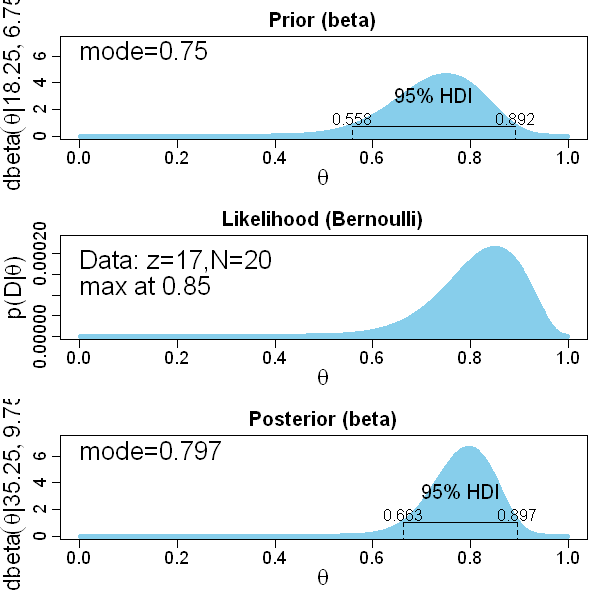

In [147]:
# Ex.2
# BernBetaExample.R
source("DBDA2E-utilities.R")  # Load definitions of graphics functions etc.
source("BernBeta.R")          # Load the definition of the BernBeta function

# Specify the prior:
t = 0.75             # Specify the prior MODE.事前分布の最頻値
n = 25               # Specify the effective prior sample size 事前分布のサンプル数.
a = t*(n-2) + 1      # Convert to beta shape parameter a. ベータ分布の a に変換
b = (1-t)*(n-2) + 1  # Convert to beta shape parameter b. ベータ分布の b に変換

Prior = c(a,b)       # Specify Prior as vector with the two shape parameters.

# Specify the data:
N = 20                         # The total number of flips. 尤度の N
z = 17                         # The number of heads. 尤度の z
Data = c(rep(0,N-z),rep(1,z))  # Convert N and z into vector of 0's and 1's.

#openGraph(width=5,height=7)
posterior = BernBeta( priorBetaAB=Prior, Data=Data , plotType="Bars" , 
                      showCentTend="Mode" , showHDI=TRUE , showpD=FALSE )
#saveGraph(file="BernBetaExample",type="png")

- Ex.3 発見された物資の色の話


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



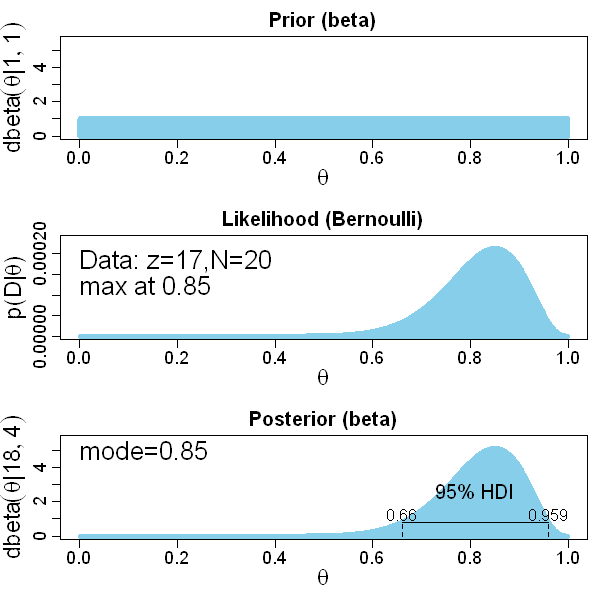

In [197]:
# Ex.3
# BernBetaExample.R
source("DBDA2E-utilities.R")  # Load definitions of graphics functions etc.
source("BernBeta.R")          # Load the definition of the BernBeta function

# Specify the prior:
#t = 0.75             # Specify the prior MODE.事前分布の最頻値
#n = 25               # Specify the effective prior sample size 事前分布のサンプル数.
a = 1 #t*(n-2) + 1      # Convert to beta shape parameter a. ベータ分布の a に変換
b = 1 #(1-t)*(n-2) + 1  # Convert to beta shape parameter b. ベータ分布の b に変換

Prior = c(a,b)       # Specify Prior as vector with the two shape parameters.

# Specify the data:
N = 20                         # The total number of flips. 尤度の N
z = 17                         # The number of heads. 尤度の z
Data = c(rep(0,N-z),rep(1,z))  # Convert N and z into vector of 0's and 1's.

#openGraph(width=5,height=7)
posterior = BernBeta( priorBetaAB=Prior, Data=Data , plotType="Bars" , 
                      showCentTend="Mode" , showHDI=TRUE , showpD=FALSE )
#saveGraph(file="BernBetaExample",type="png")

In [149]:
Prior

[1] 1 1

In [150]:
Data

[1] 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### 6.4.2 ベータ分布として表せられない事前知識

- 2つの頂点を持つ二峰事前分布は、ベータ分布として表せられない事前知識
 - ダウンロードしたライブラリのBernGridを使う

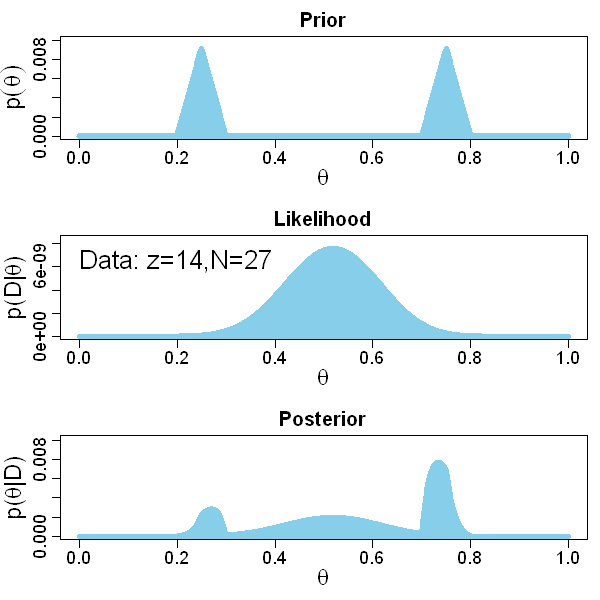

In [151]:
Theta = seq(0, 1, length=1000 )
pTheta = c( rep(1,200), seq(1,100,length=50), seq(100,1,length=50),
            rep(1,200), rep(1,200), seq(1,100,length=50),
            seq(100,1,length=50), rep(1,200))
pTheta = pTheta/sum(pTheta)
#plot(seq(1,1000), pTheta)

Data = c(rep(0,13), rep(1,14))
#Data

source("BernGrid.R")
posterior = BernGrid(Theta, pTheta, Data, Data, plotType="Bars",
                    showCentTend="None", showHDI=FALSE, showpD=FALSE)

## 6.5 まとめ
- 数値による近似ではなく、解析的に数学のみを用いて、ベイズの公式が解くことができる場合についてデモンストレーションした
 - 尤度が共役事前分布を持つケース
 - 残念ながら、複雑なモデルでは共役事前分布を持たない
- 複雑なモデルでは正確な数学的解決を捨て、MCMCを用いることになる

## 6.7 エクササイズ
- https://sites.google.com/site/doingbayesiandataanalysis/

### エクササイズ 6.1
- コインの話

[1] "****** A ******"

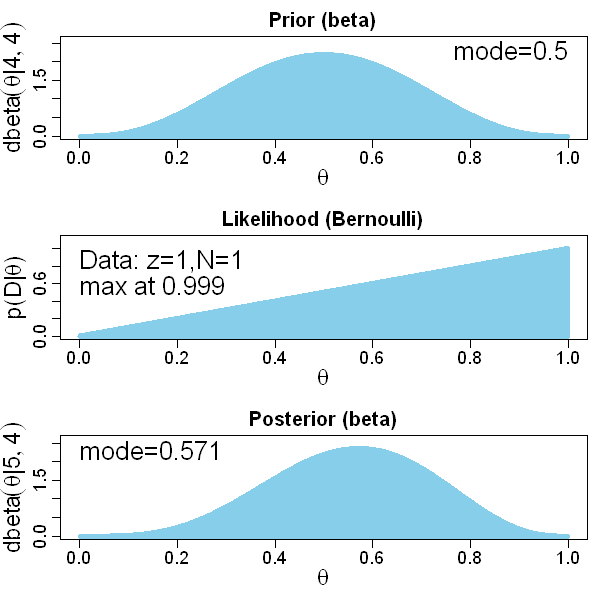

In [209]:
# A
sprintf("****** A ******")
post = BernBeta(c(4,4), c(1), showCentTend = "Mode") # H

[1] "****** B ******"

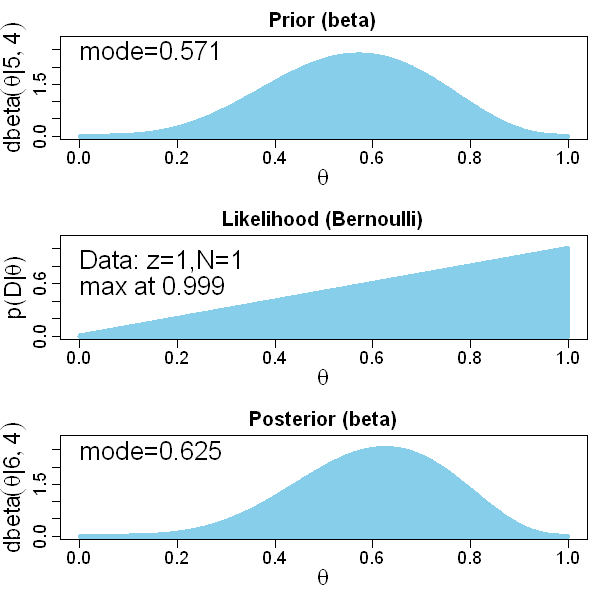

In [210]:
# B
sprintf("****** B ******")
post = BernBeta(post, c(1), showCentTend = "Mode") # H

[1] "****** C ******"

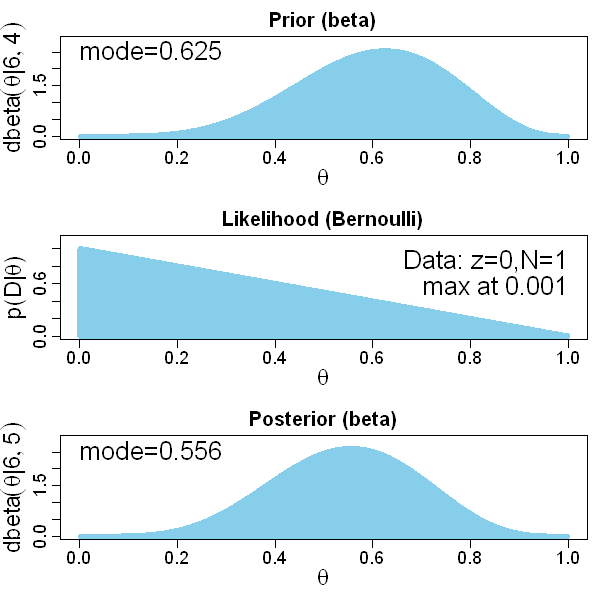

In [211]:
# C
sprintf("****** C ******")
post = BernBeta(post, c(0), showCentTend = "Mode") # T

[1] "****** D ******"

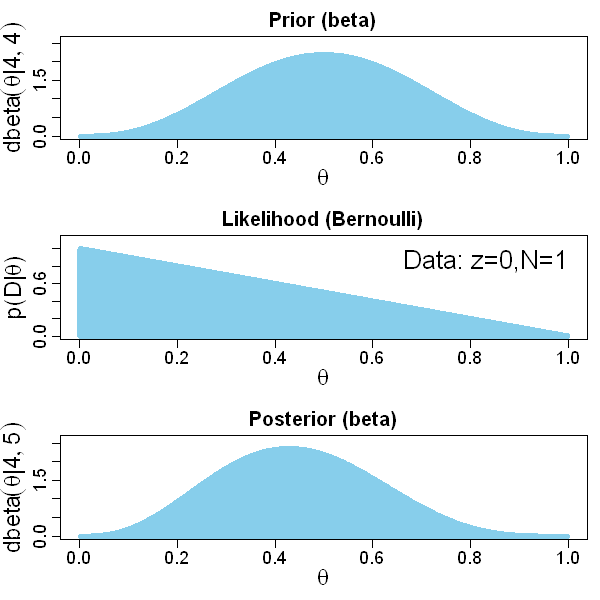

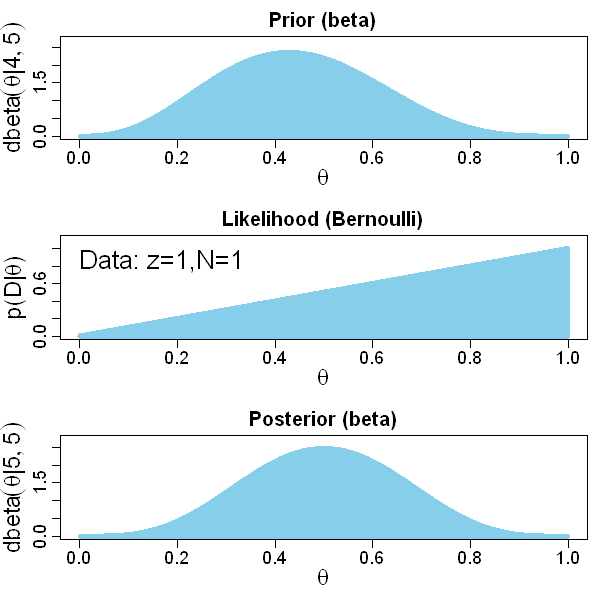

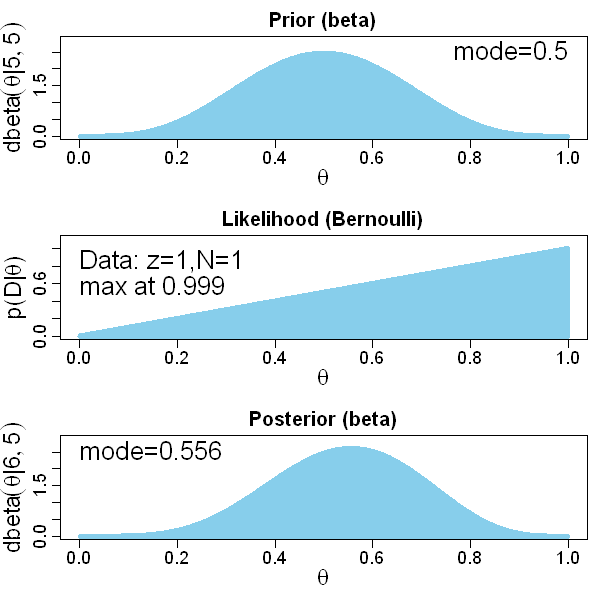

In [212]:
# D
sprintf("****** D ******")
post = BernBeta(c(4,4), c(0)) 
post = BernBeta(post, c(1)) 
post = BernBeta(post, c(1), showCentTend = "Mode") 

### エクササイズ 6.2
- 選挙の世論調査の話

- (A) 95%最高密度区間(HDI)
- 無情報って0 or 1
```R
BernBeta(c(58,41), c(0), showHDI = TRUE)
```

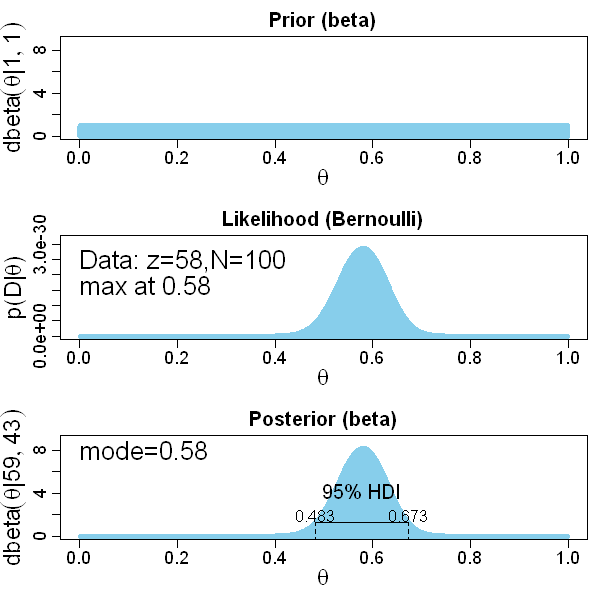

In [217]:
post = BernBeta(c(1,1), c(rep(1,58), rep(0,42)), showHDI = TRUE, showCentTend = "Mode")

- (B) 

[1] 116  86

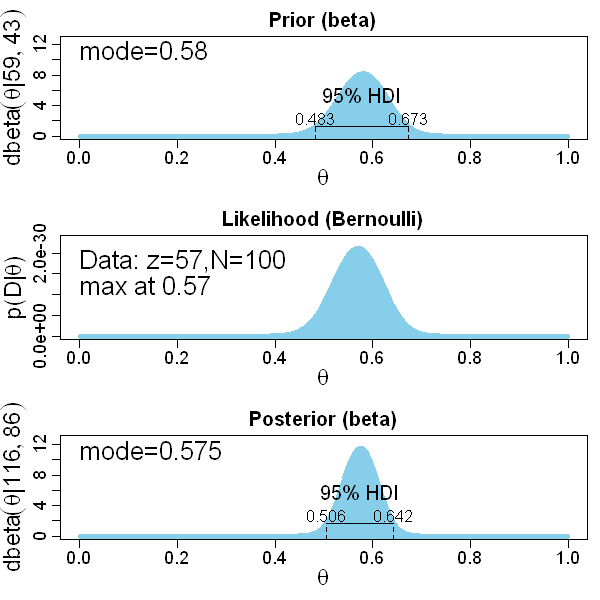

In [218]:
BernBeta(post, c(rep(1,57), rep(0,43)), showHDI = TRUE, showCentTend = "Mode")

### エクササイズ 6.3
- Train
 - (ラジオ, 海) => F key
 - (ラジオ, 山) => J key
- Test1
 - (ラジオ) => { F:40, J:10 }
- Test2
 - (山, 海) => { F:15, J:35 }
- Question
 - 母集団はF, Jどちらに偏っているか？
<hr>
- ROPE (Region of Practical Equivalence)
 - 実践的に等価な範囲(ROPE), p342
 - ROPEの全体がパラメータの事後分布の 95% HDI
   - 外側 => そのパラメータは確信できない (棄却される)
   - 内側 => そのパラメータは実用的な目的にあったものとし受容される
 - DBDA1E.pdf p73

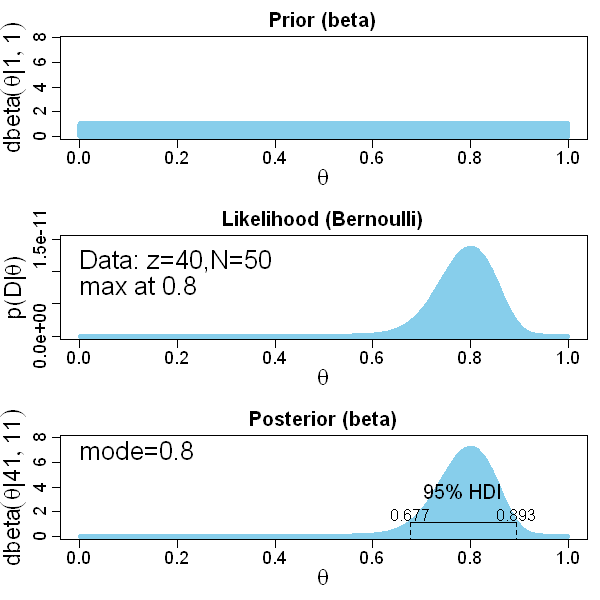

In [221]:
# 1=> F, 0=>J
# Test1
post = BernBeta(c(1,1) , Data=c(rep(1,40),rep(0,10)) ,
        showHDI=TRUE , showCentTend="Mode" )

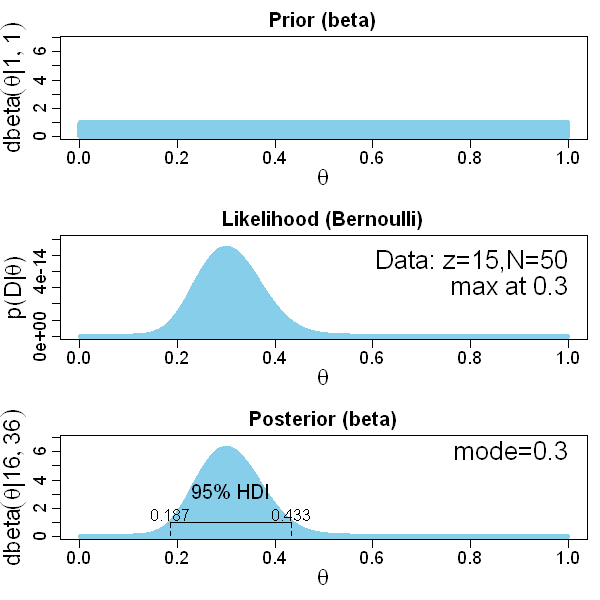

In [222]:
# 1=> F, 0=>J
# Test2
post = BernBeta(c(1,1) , Data=c(rep(1,15),rep(0,35)) ,
        showHDI=TRUE , showCentTend="Mode" )

### エクササイズ 6.4
- マジックショップのコイン
 - 毎回表になるか、裏になるような強い偏りがあるコイン (事前分布) => $beta(\theta, 0.01, 0.01)$
 - 観測データ => {表:4回,裏:1回}

[1] 4.01 1.01

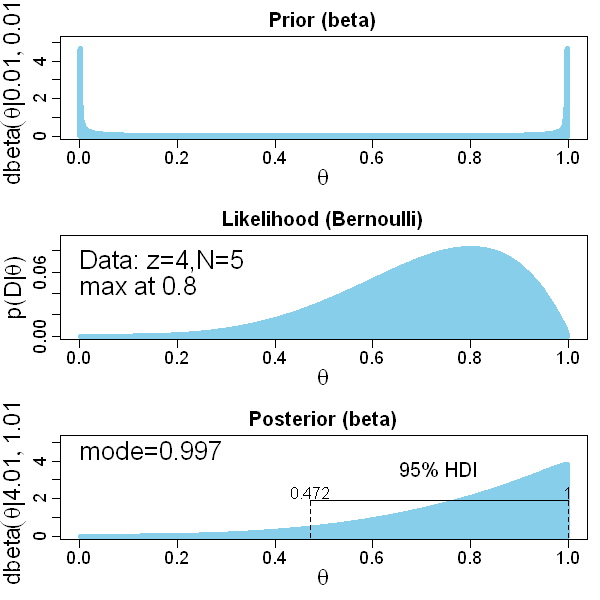

In [224]:
BernBeta(c(1,1)/100, c(rep(1,4),rep(0,1)) ,showHDI=TRUE , showCentTend="Mode" )

### エクササイズ 6.5
- 政府発行のコイン

- (A)
 - 公平であると強い信念を持っている => $beta(\theta, 500, 500)$

[1] 509 501

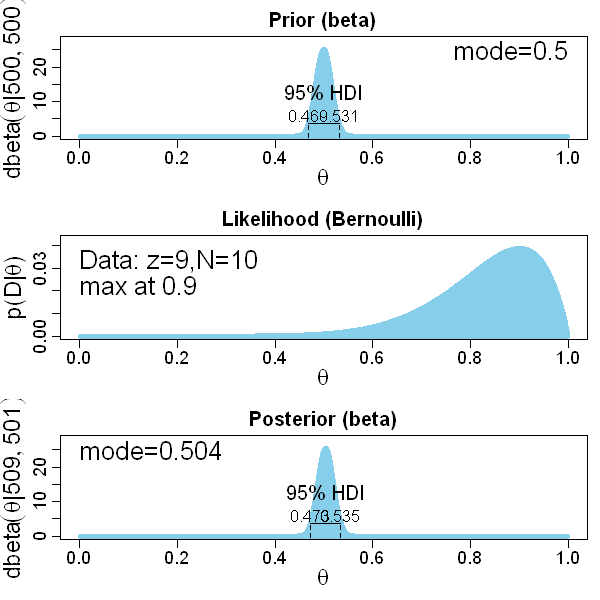

In [229]:
BernBeta(c(1,1)*500, c(rep(1,9), rep(0,1)), showCentTend = "Mode" ,showHDI = TRUE)

- (B)
 - 不思議な物質で作られた不思議な刻印のあるコイン

[1] 9.01 1.01

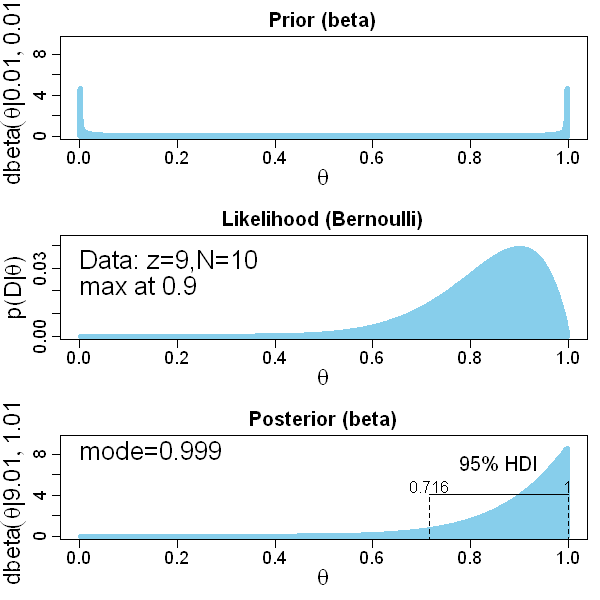

In [230]:
BernBeta(c(1,1)/100, c(rep(1,9), rep(0,1)), showCentTend = "Mode" ,showHDI = TRUE)